In [51]:
import simexpal
import yaml
import matplotlib.pyplot as plt

cfg = simexpal.config_for_dir()

results = []
for run in cfg.collect_successful_results():
    with run.open_output_file() as f:
        yml = yaml.load(f, Loader=yaml.SafeLoader)
    results.append(yml)

for r in sorted(results, key=lambda r: (r['threads'], r['algo'])):
    print('Algorithm {}, {} threads takes: {} ms (insert), {} ms (lookup)'.format(
          r['algo'], r['threads'], r['time_insert'], r['time_lookup']))

Algorithm concurrent-chaining, 1 threads takes: 23031 ms (insert), 19167 ms (lookup)
Algorithm locked-linear, 1 threads takes: 13036 ms (insert), 13019 ms (lookup)
Algorithm lockfree-linear, 1 threads takes: 10382 ms (insert), 7666 ms (lookup)
Algorithm concurrent-chaining, 2 threads takes: 14194 ms (insert), 9679 ms (lookup)
Algorithm locked-linear, 2 threads takes: 31731 ms (insert), 31828 ms (lookup)
Algorithm lockfree-linear, 2 threads takes: 5206 ms (insert), 3869 ms (lookup)
Algorithm concurrent-chaining, 4 threads takes: 14340 ms (insert), 8279 ms (lookup)
Algorithm locked-linear, 4 threads takes: 52899 ms (insert), 52634 ms (lookup)
Algorithm lockfree-linear, 4 threads takes: 4202 ms (insert), 2838 ms (lookup)
Algorithm concurrent-chaining, 8 threads takes: 7979 ms (insert), 4593 ms (lookup)
Algorithm locked-linear, 8 threads takes: 56387 ms (insert), 58765 ms (lookup)
Algorithm lockfree-linear, 8 threads takes: 1795 ms (insert), 1517 ms (lookup)
Algorithm concurrent-chaining, 

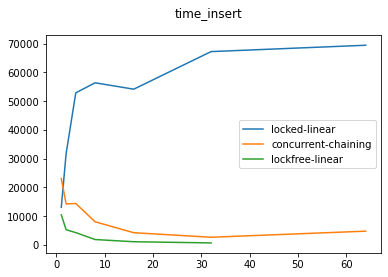

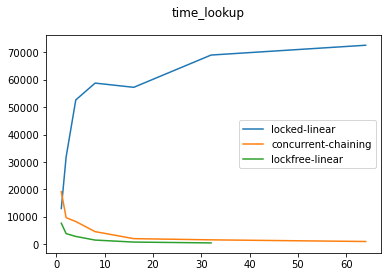

In [52]:
def extract_times(algo, key):
    res = []
    for r in sorted(results, key=lambda r: r['threads']):
        if r['algo'] != algo:
            continue
        res.append((r['threads'], r[key]))
    return res

def plot(key):
    plt.suptitle(key)
    for algo in ['locked-linear', 'concurrent-chaining', 'lockfree-linear']:
        times = extract_times(algo, key)
        plt.plot([t for t, _ in times], [time for _, time in times], label=algo)
    plt.legend()
    plt.show()

plot('time_insert')
plot('time_lookup')